In [10]:
import sys
sys.path.insert(0, '../scripts')

import pandas as pd
import numpy as np
import direction_transition as dit
from meals import graph_group_stats, find_meals_paper
import paths
from preprocessing import read_csv_clean
import intervals as invs

pellet_count_threshold = 2
collect_quantile = 0.6
pellet_quantile = 0.6
time_threshold = 60

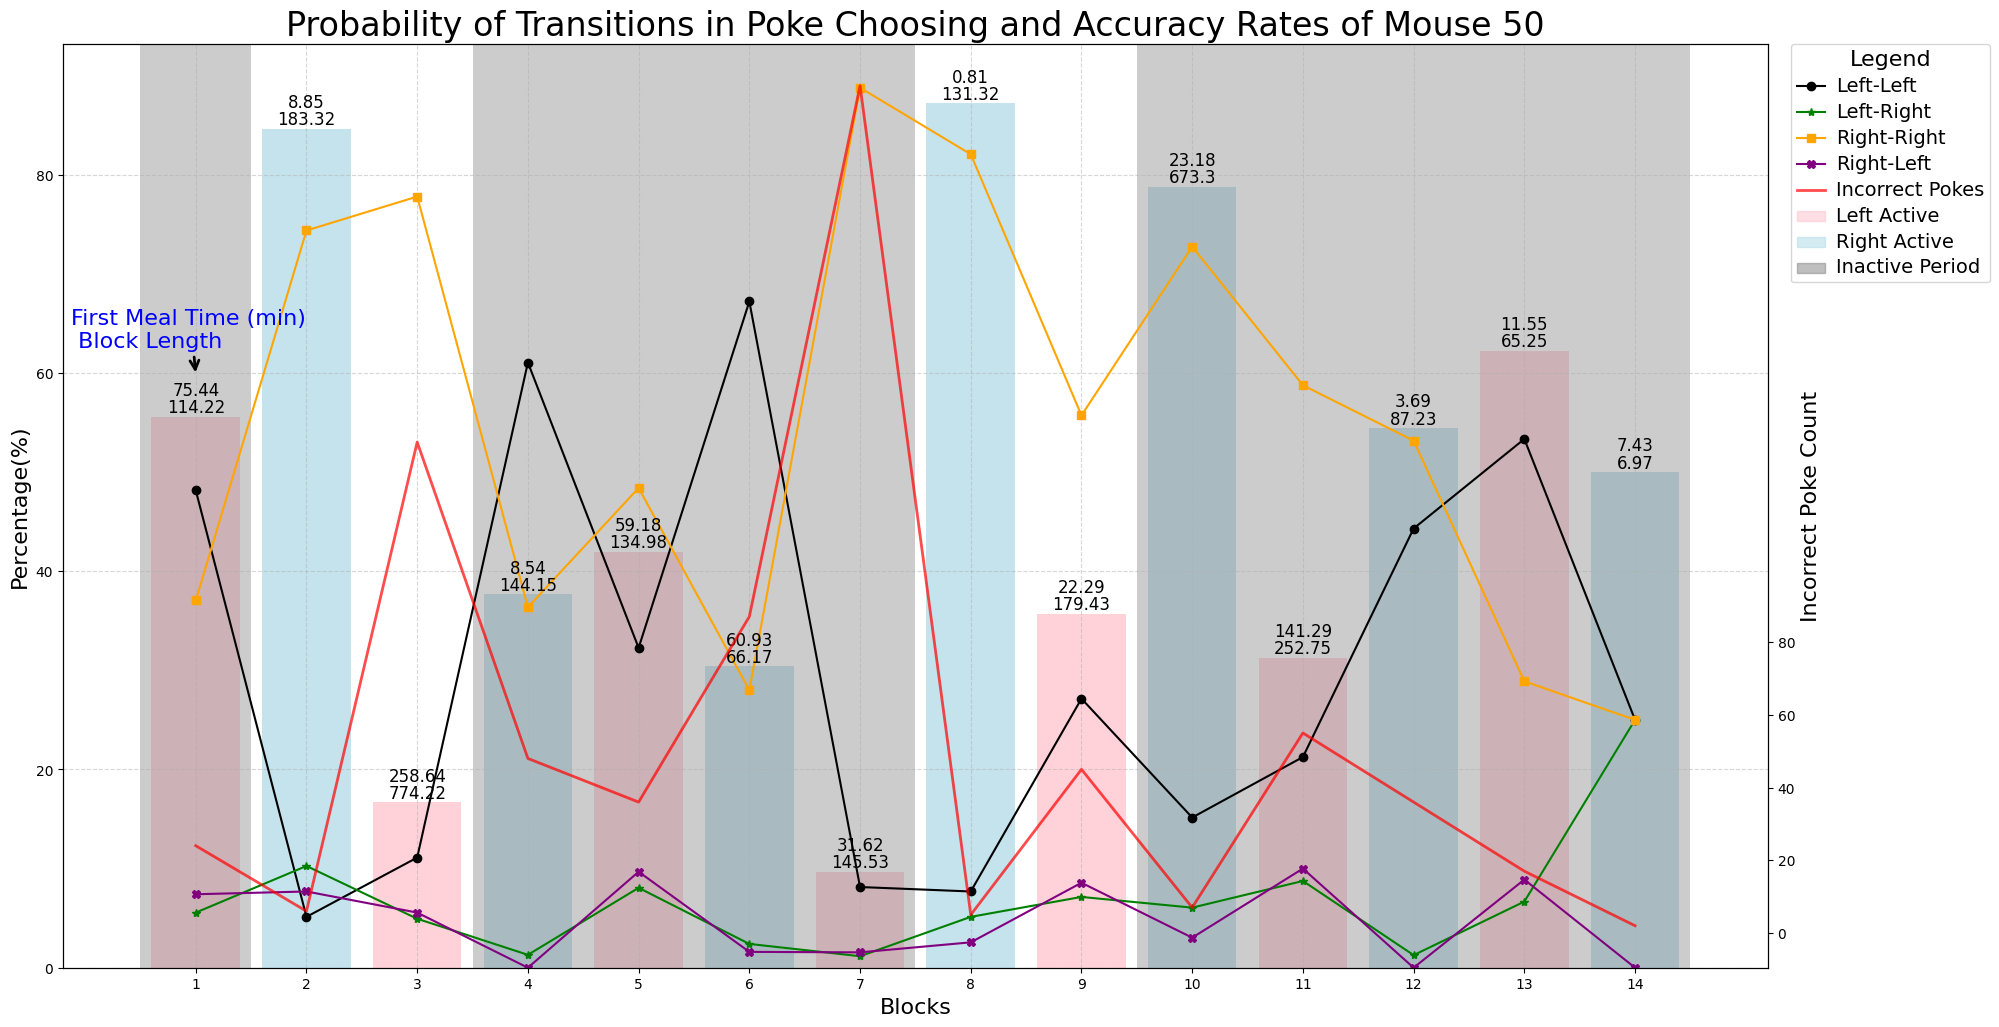

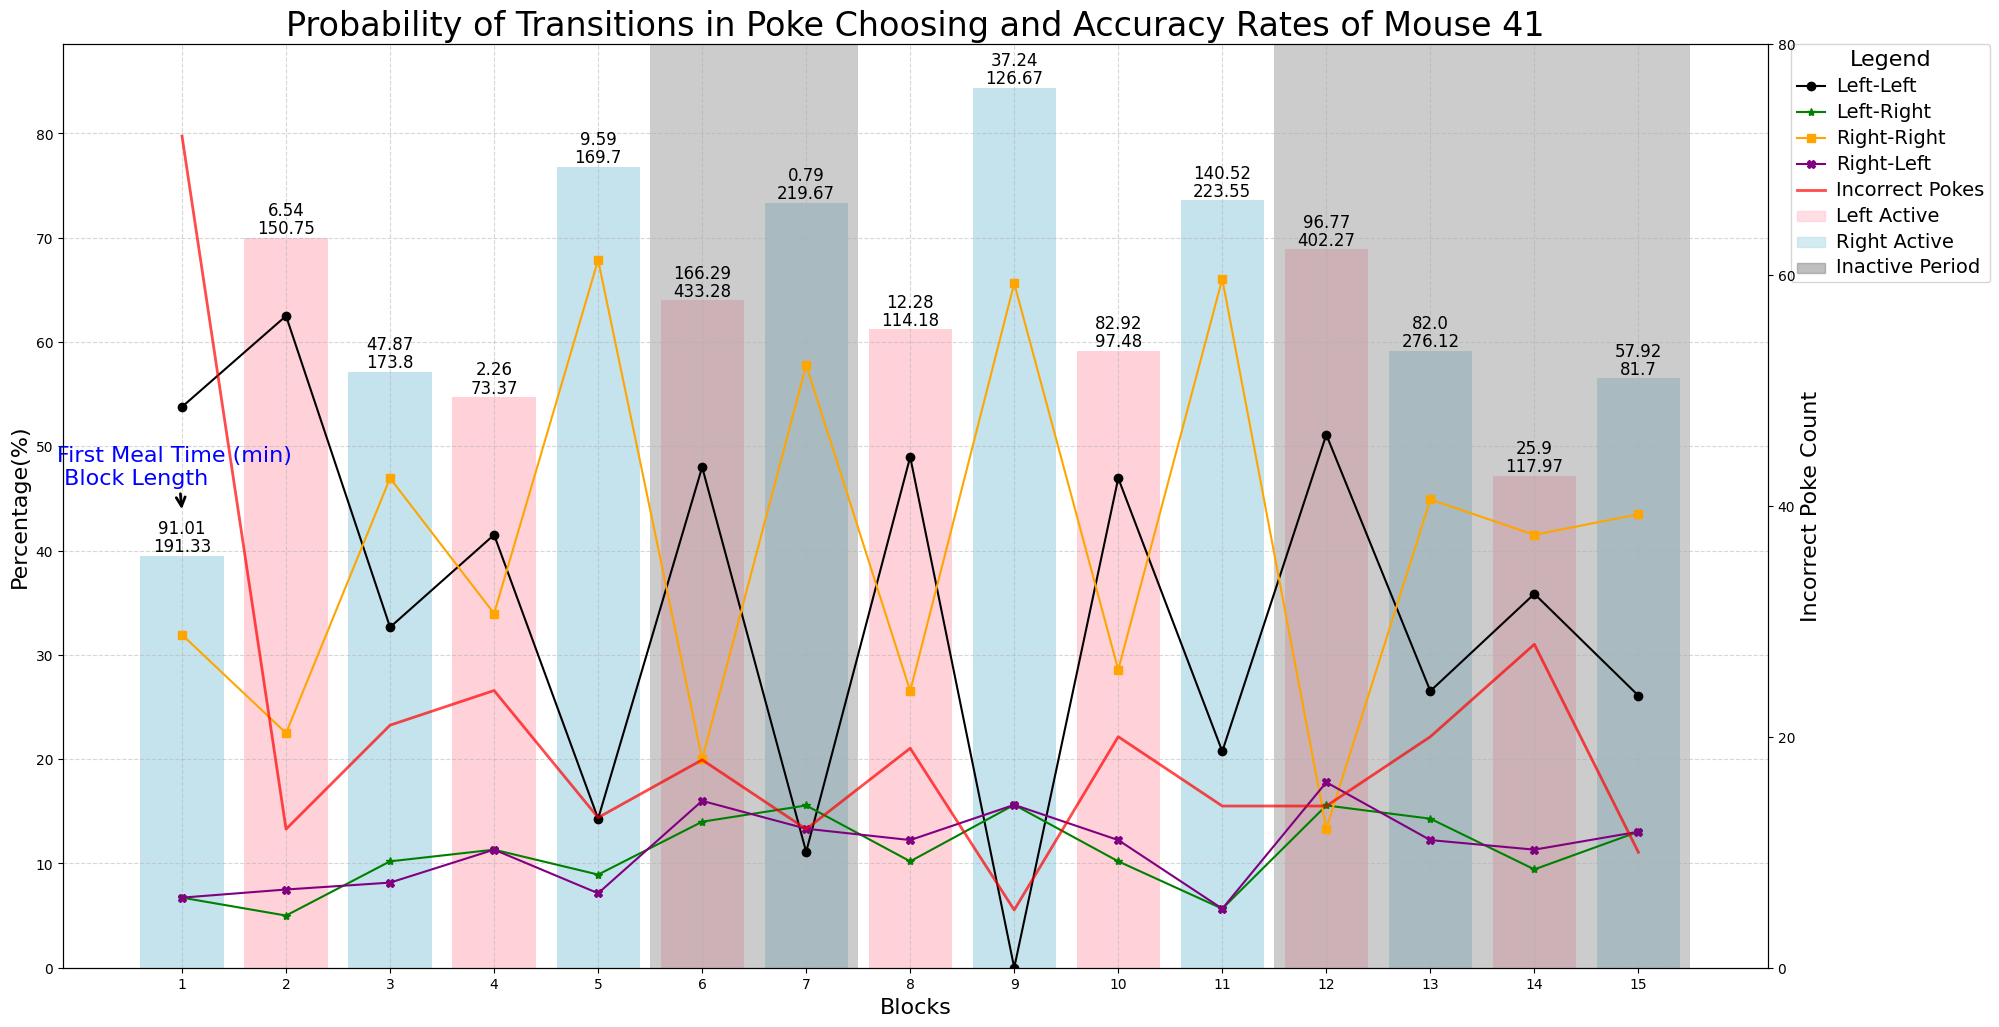

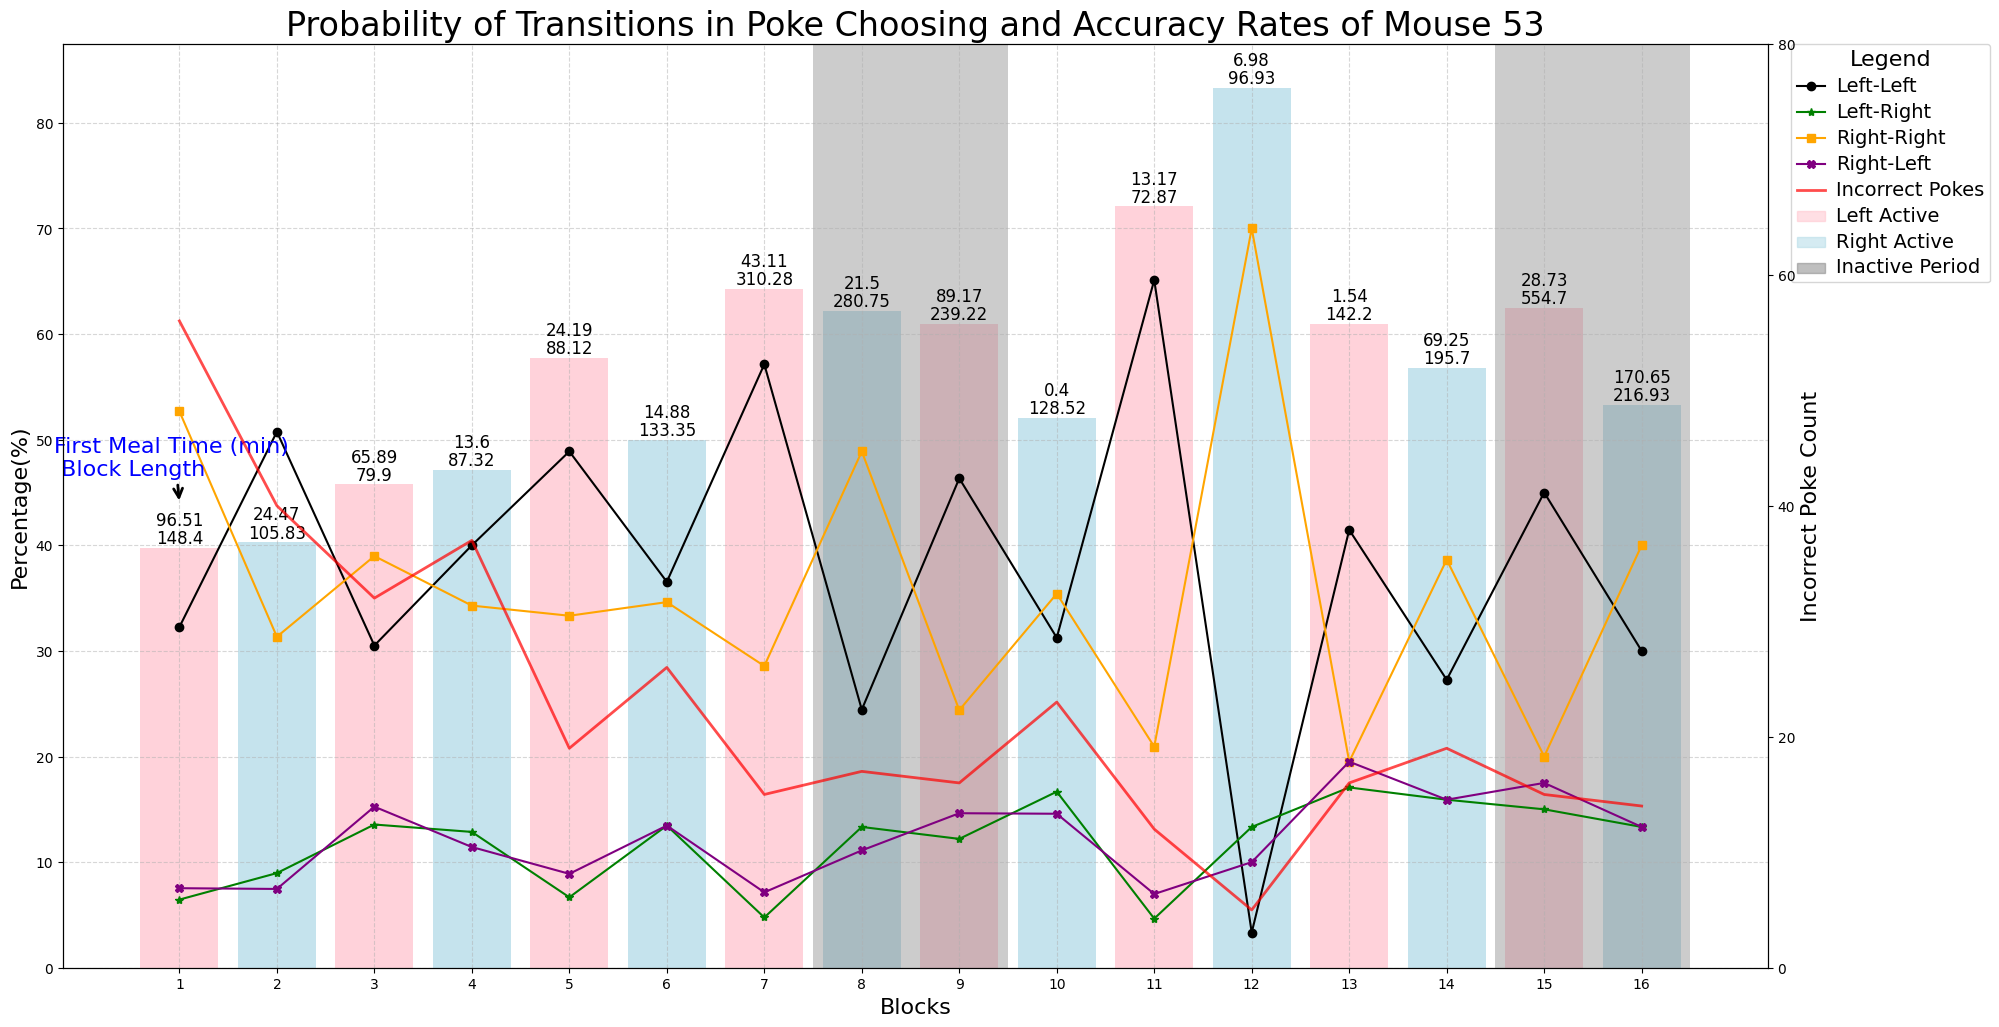

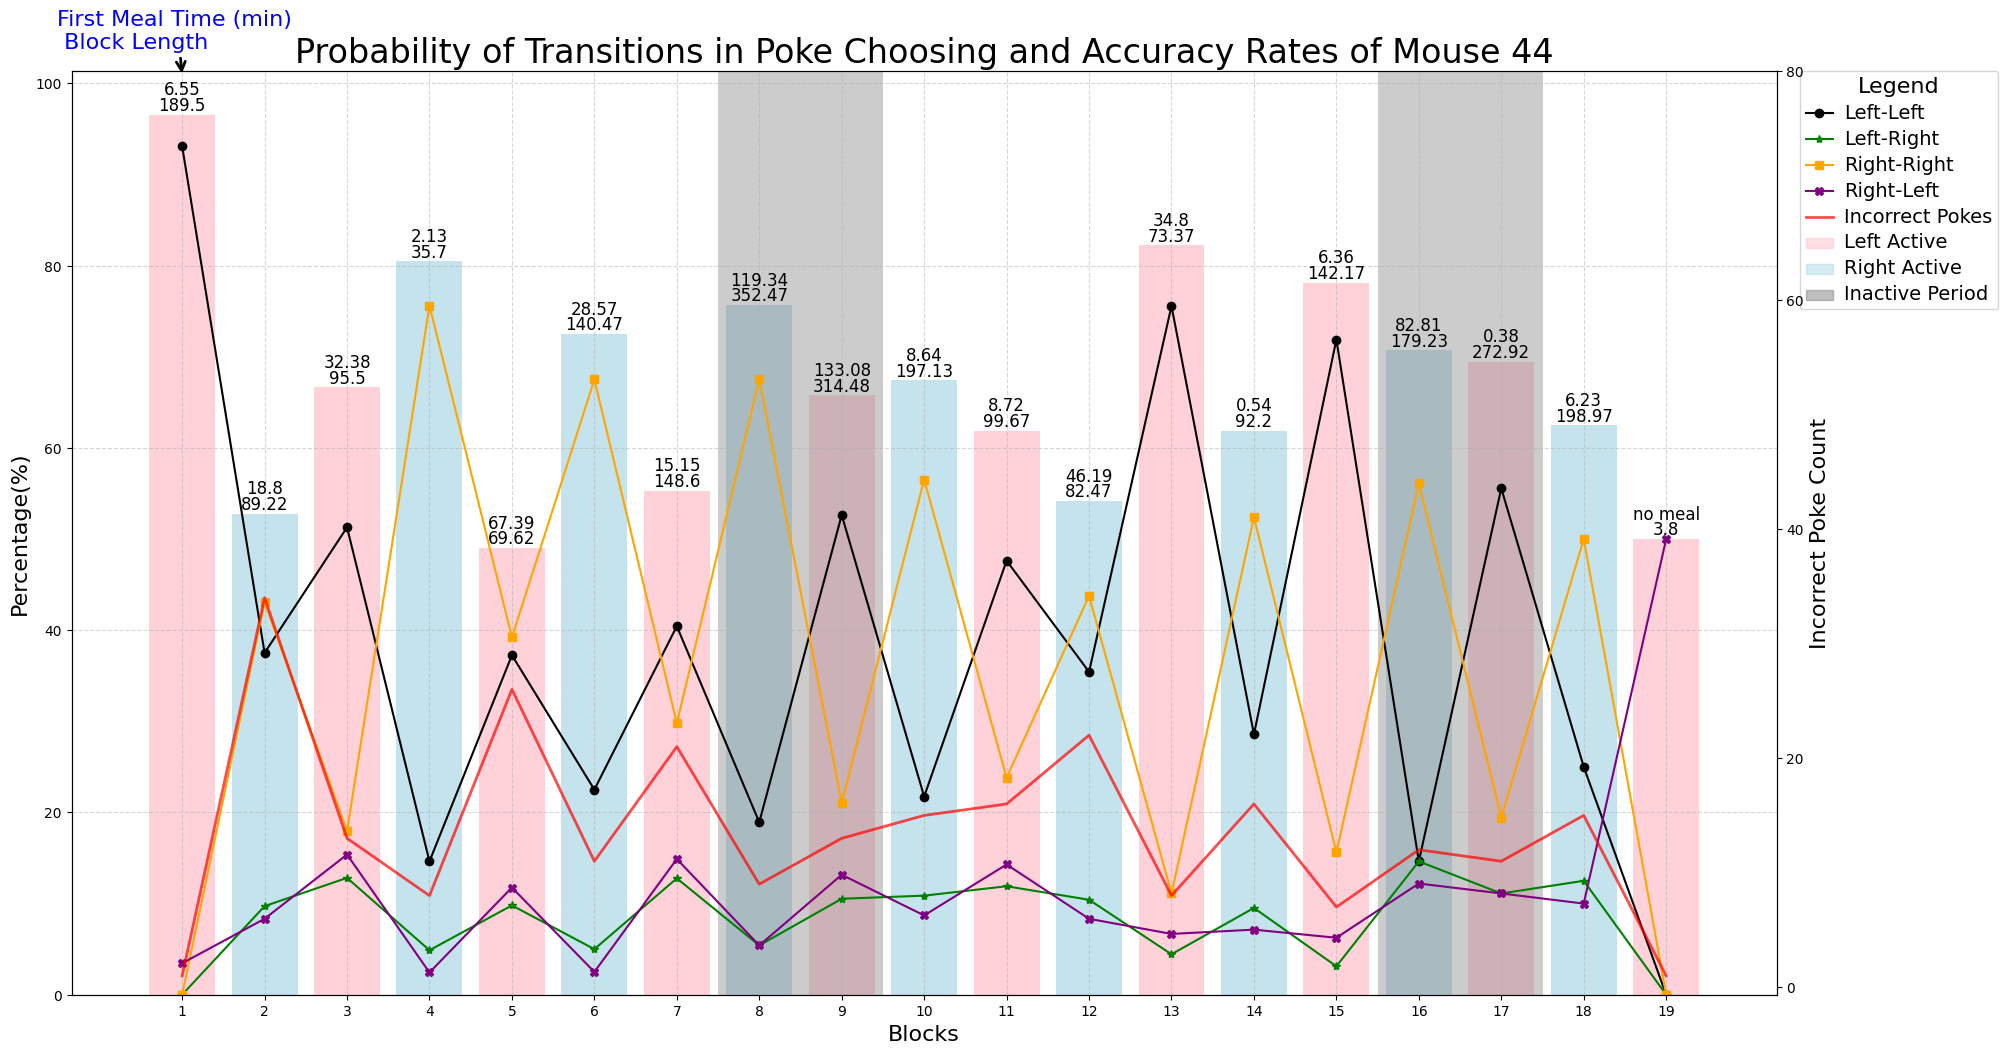

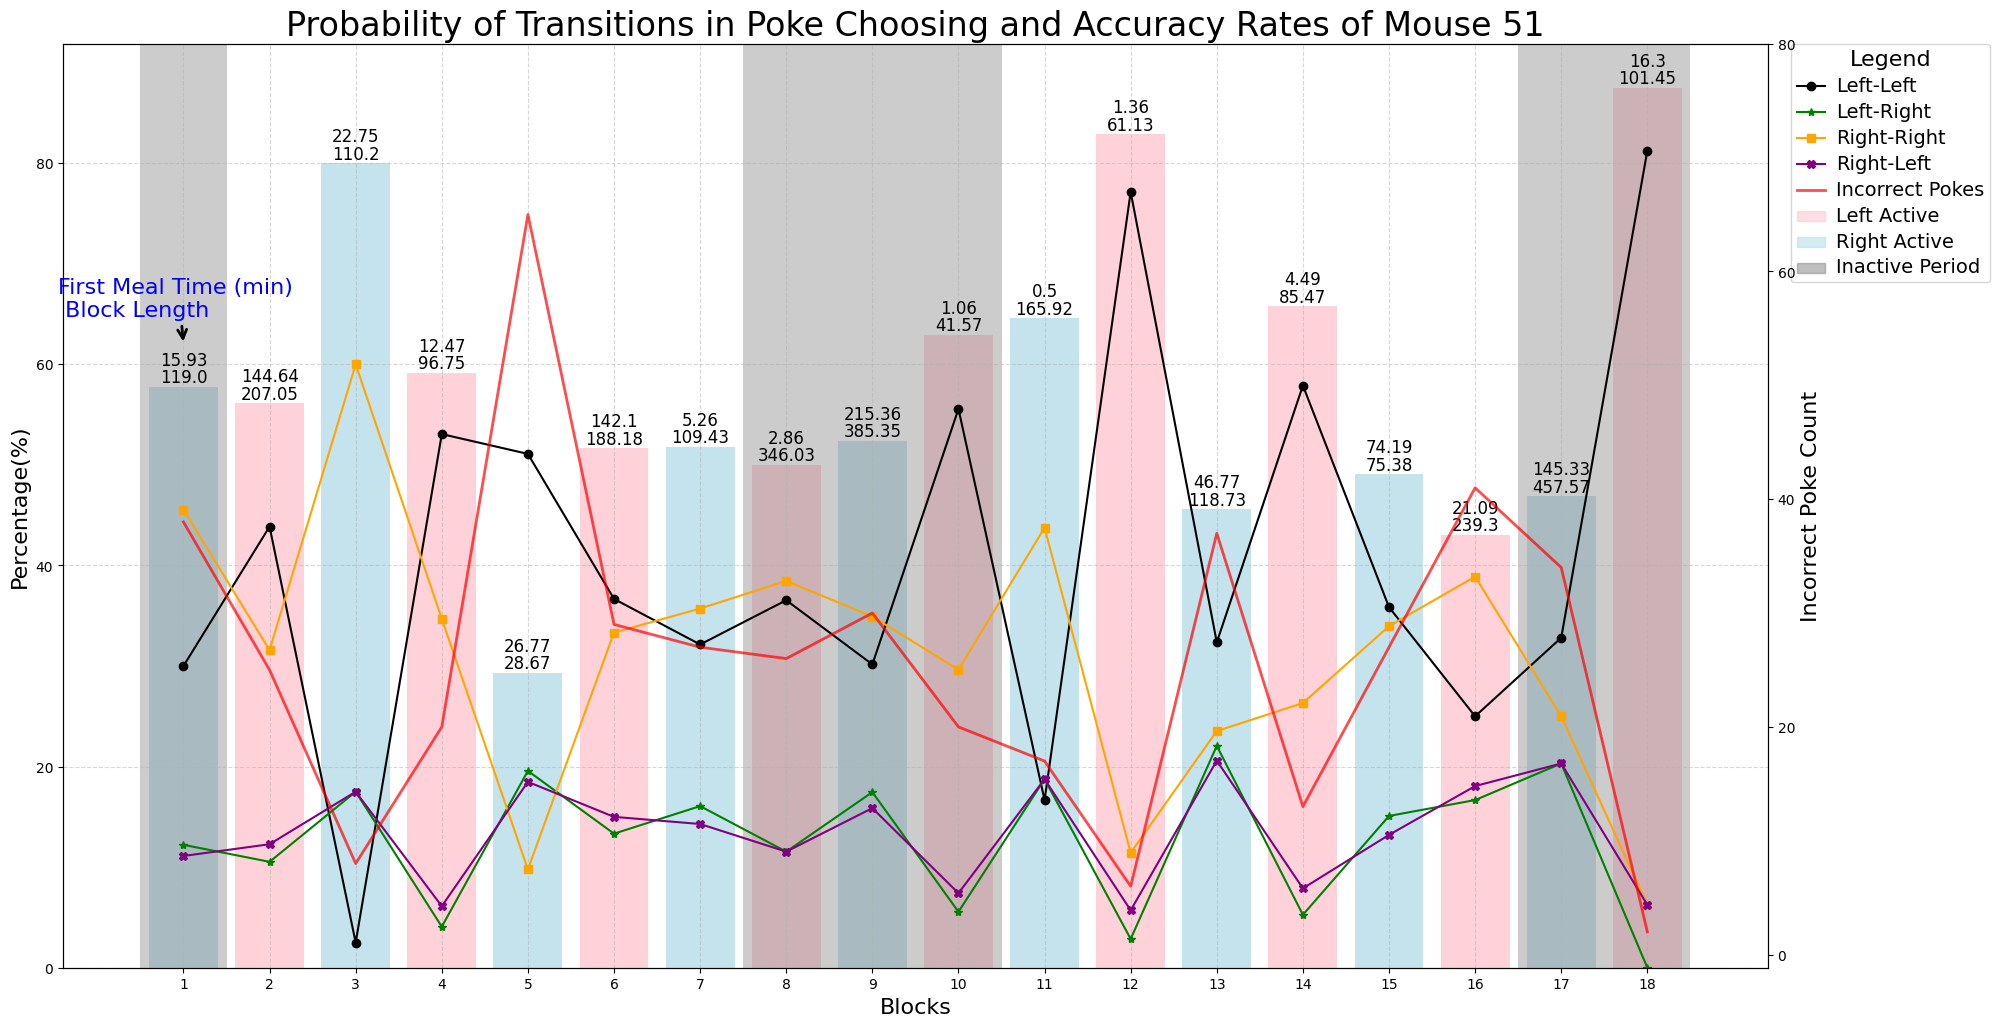

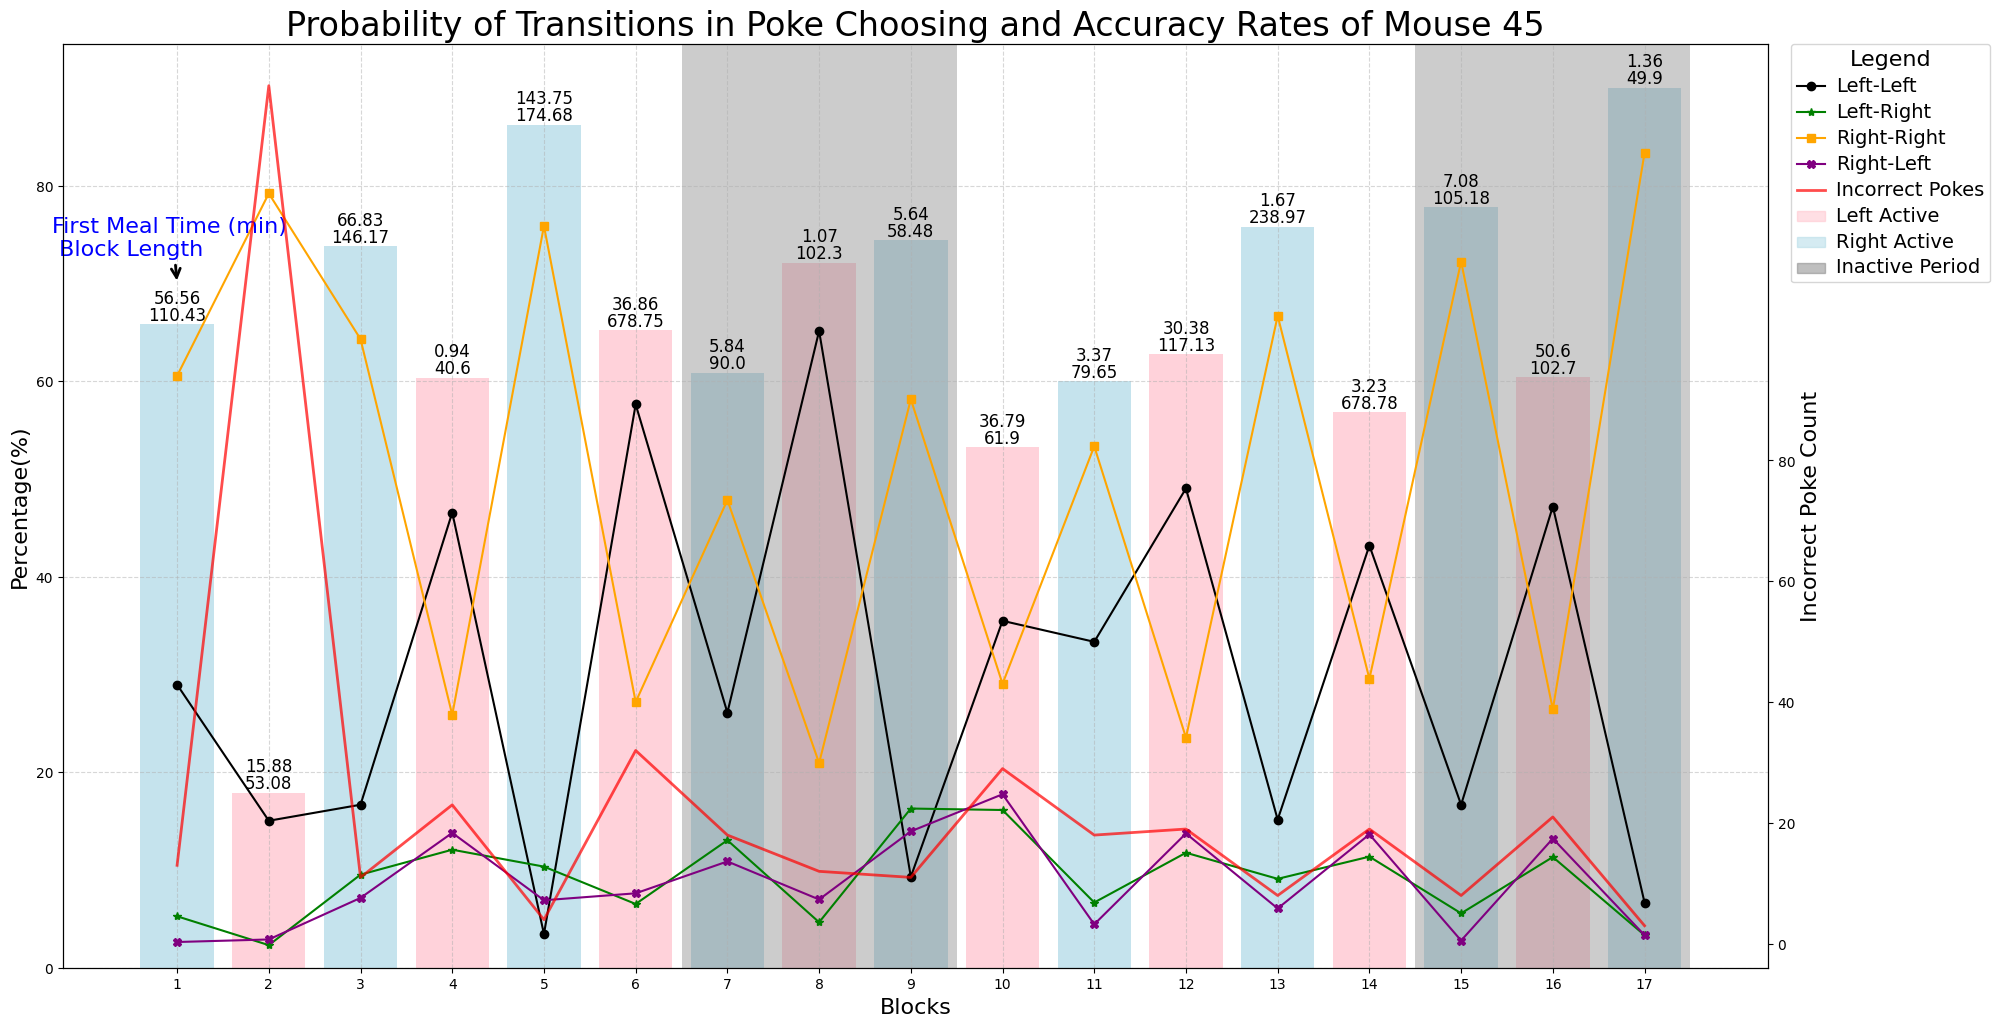

In [18]:
ctrl_block_fir_meal = []
ctrl_block_fir_meal_prop = []
ctrl_meal_avg_acc = []
for path in paths.reversal_ivsa_ctrl:
  temp_time = []
  temp_prop = []
  temp_acc = []
  meals = [] 
  temp_cnt = []
  
  data_dropped = read_csv_clean(path, remove_trivial=False, collect_time=True)
  blocks = dit.split_data_to_blocks(data_dropped)
  
  for block in blocks:
    meal, meal_pellet_cnt, meal_acc = find_meals_paper(block,
                                                        time_threshold=time_threshold, 
                                                        pellet_threshold=pellet_count_threshold)
    meals.extend(meal)
    temp_cnt.extend(meal_pellet_cnt)
    temp_acc.extend(meal_acc)
    
  data_stats = dit.get_transition_info(blocks, [time_threshold, pellet_count_threshold], reverse=True)
        
  avg_ratio, avg_time = dit.first_meal_stats(data_stats, ignore_inactive=True)
  ctrl_block_fir_meal.append(avg_time)
  ctrl_meal_avg_acc.append(np.mean(temp_acc))
  ctrl_block_fir_meal_prop.append(avg_ratio)
  # print(temp_acc[:5])
  dit.graph_tranition_stats(data_stats, blocks, path)

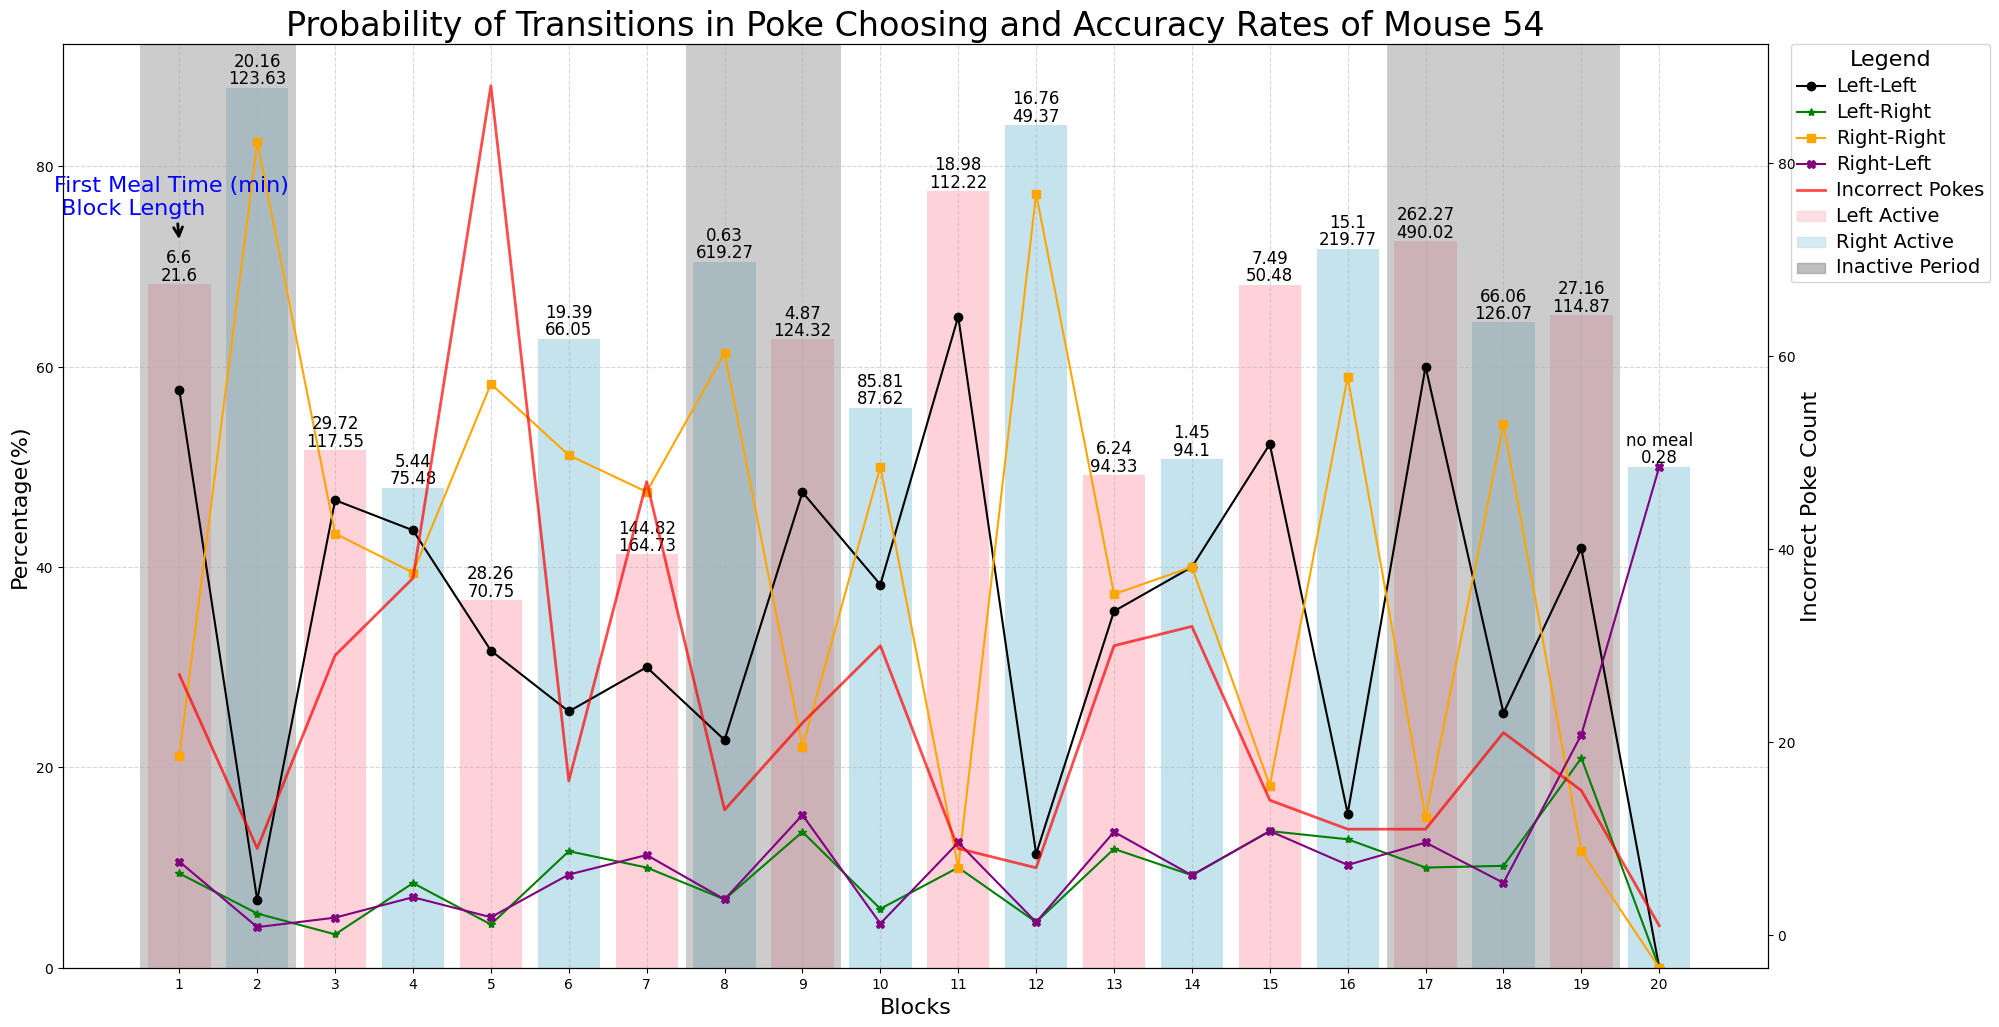

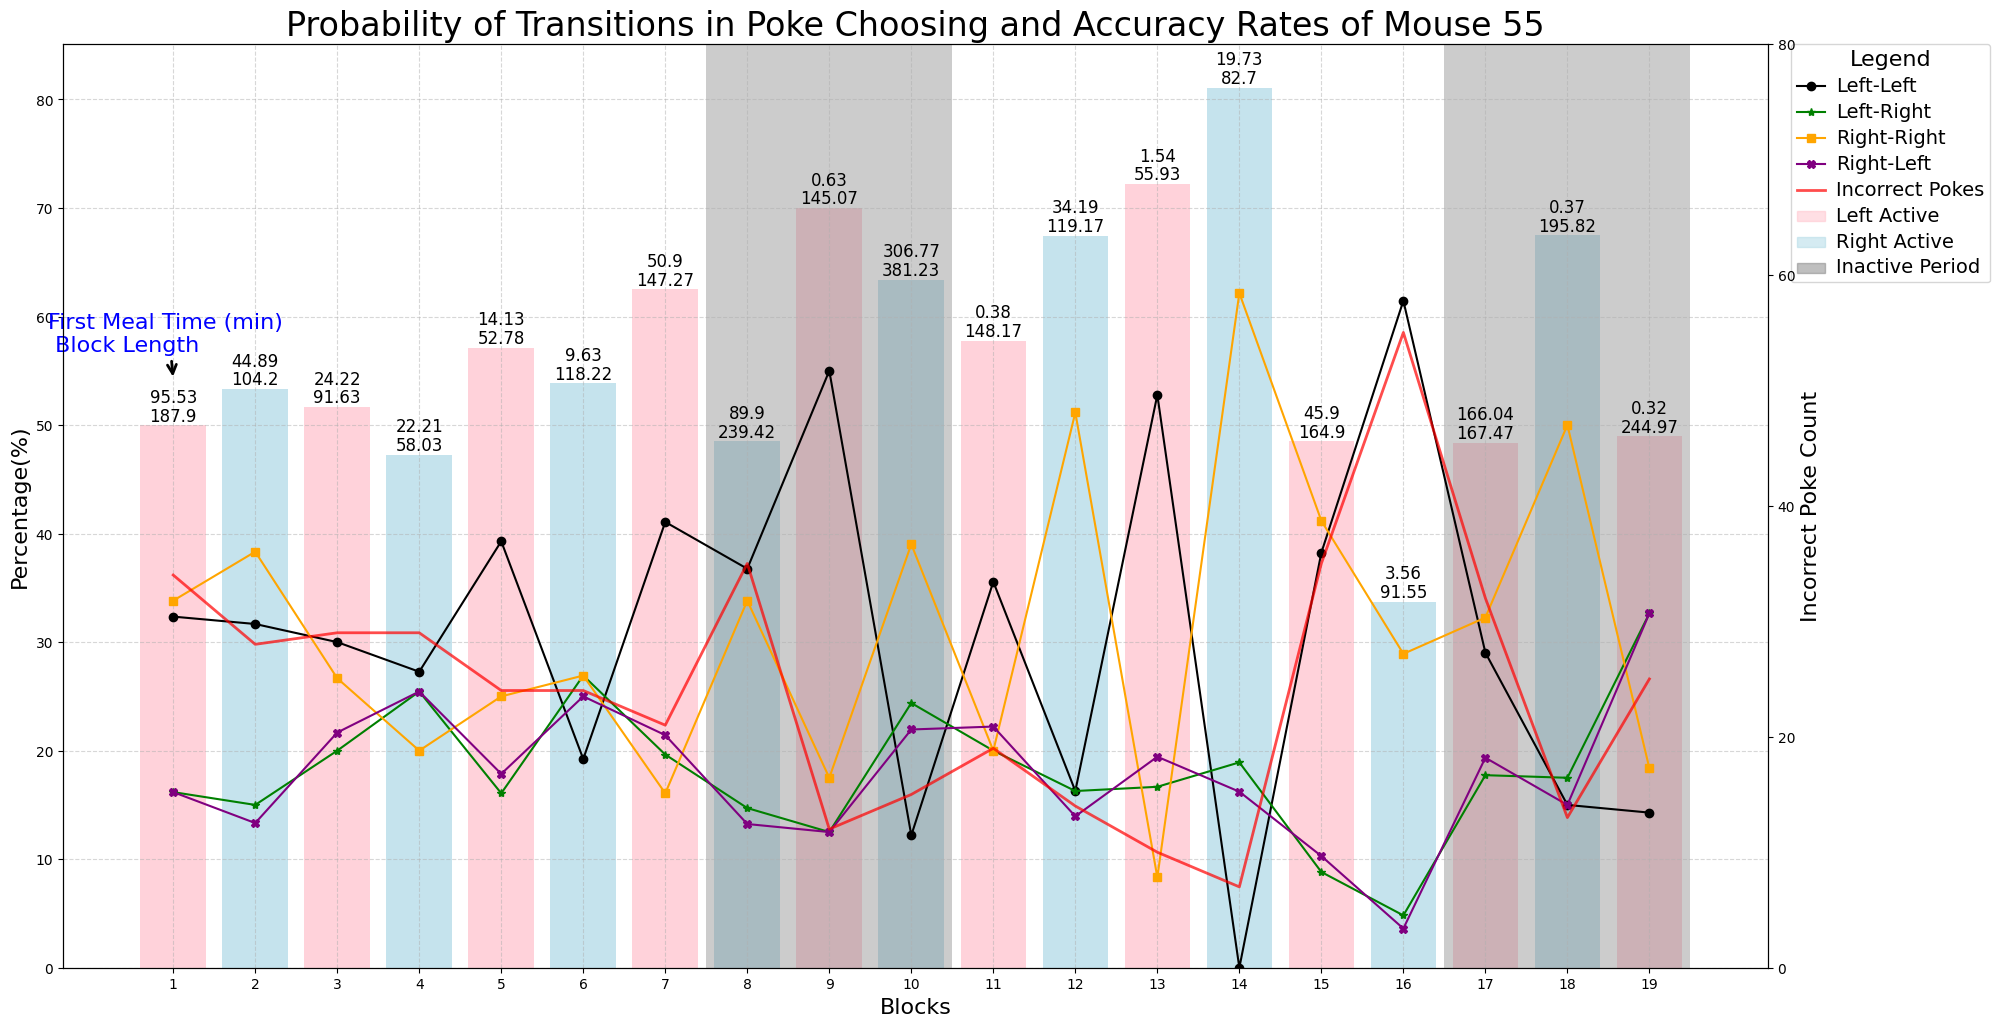

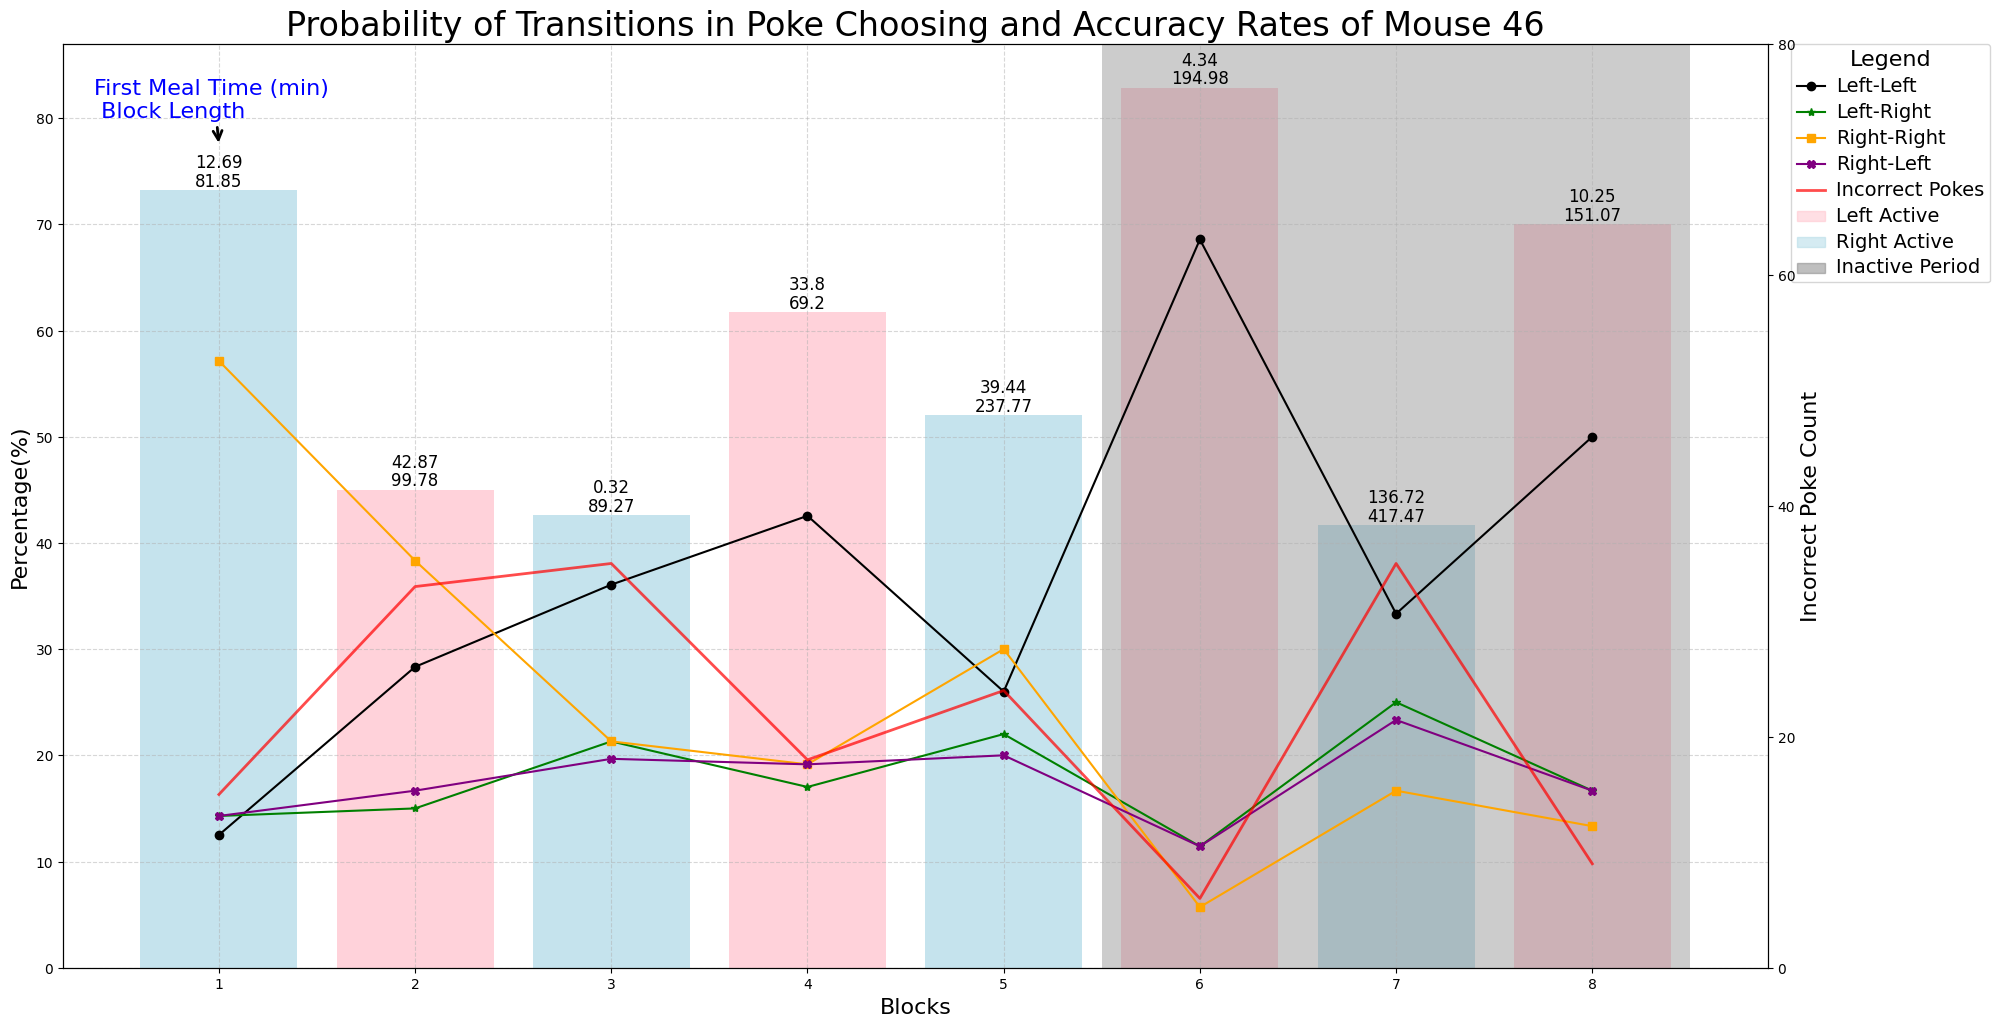

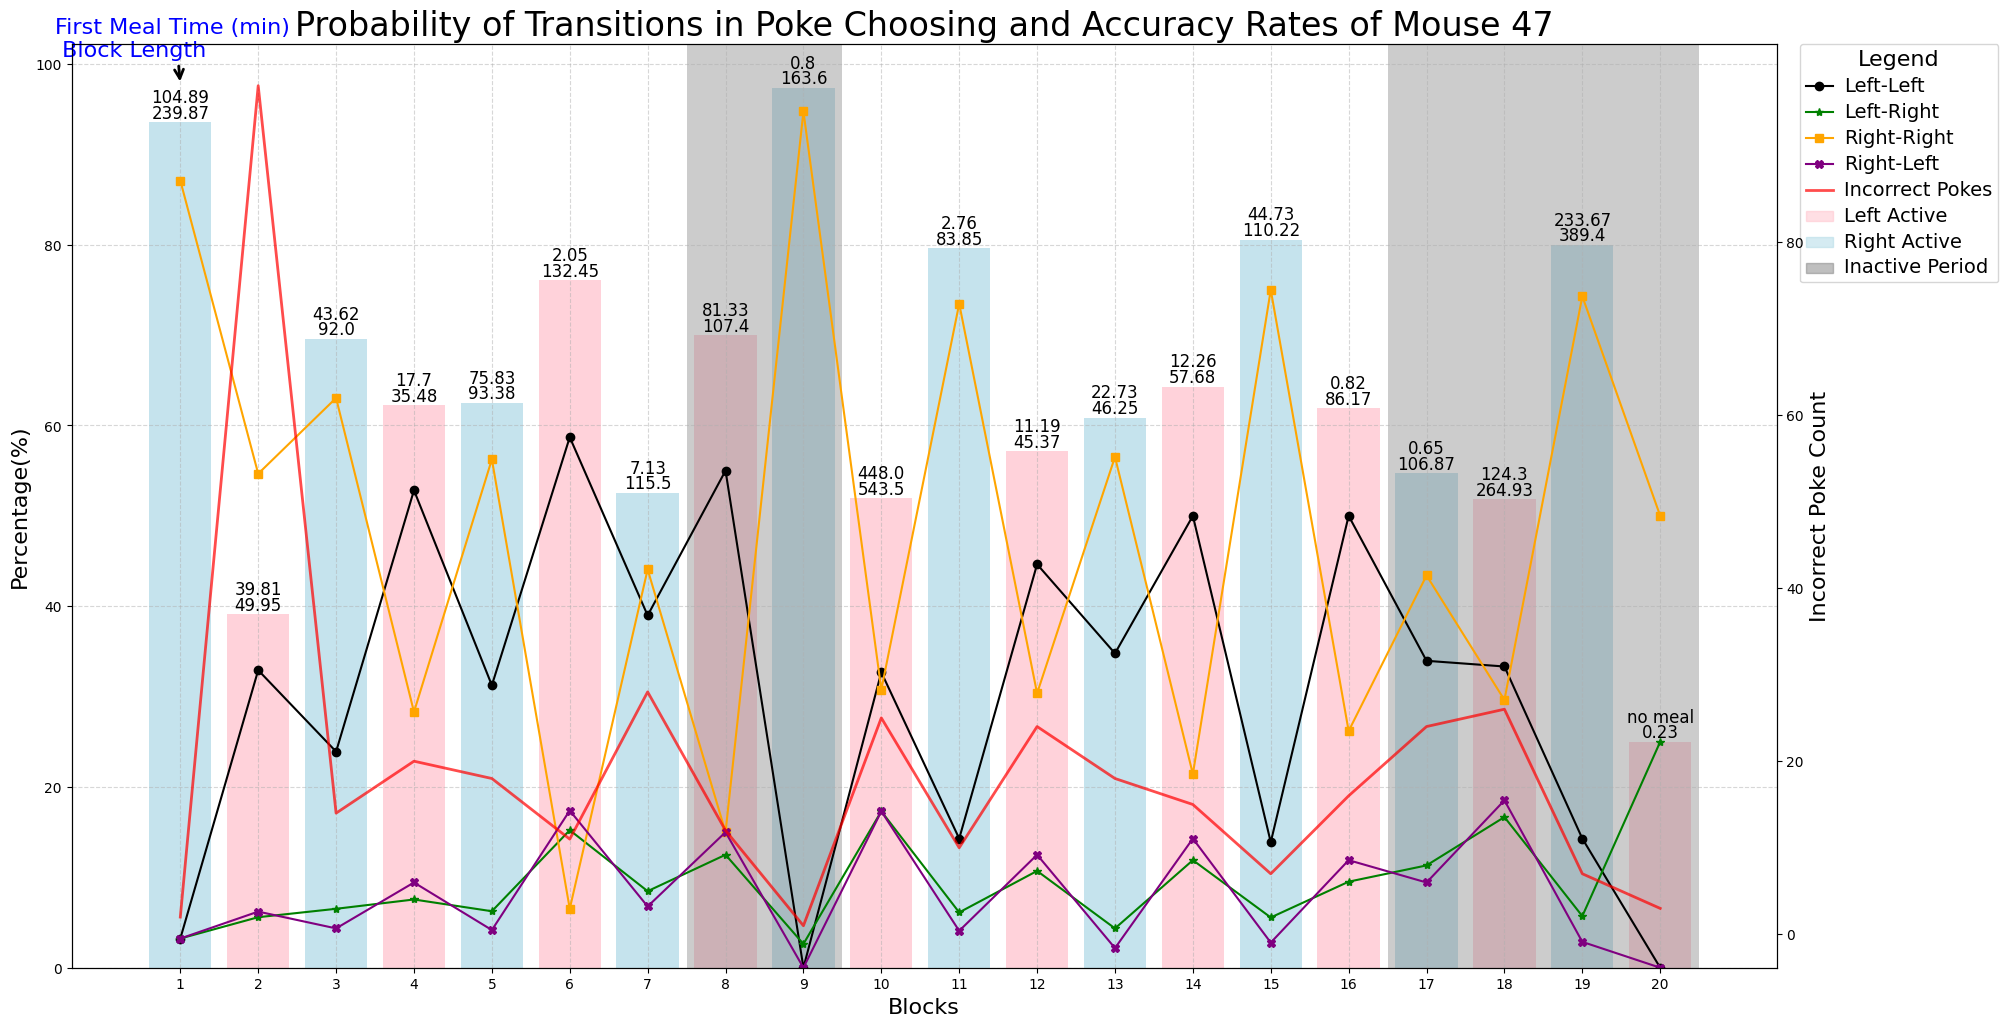

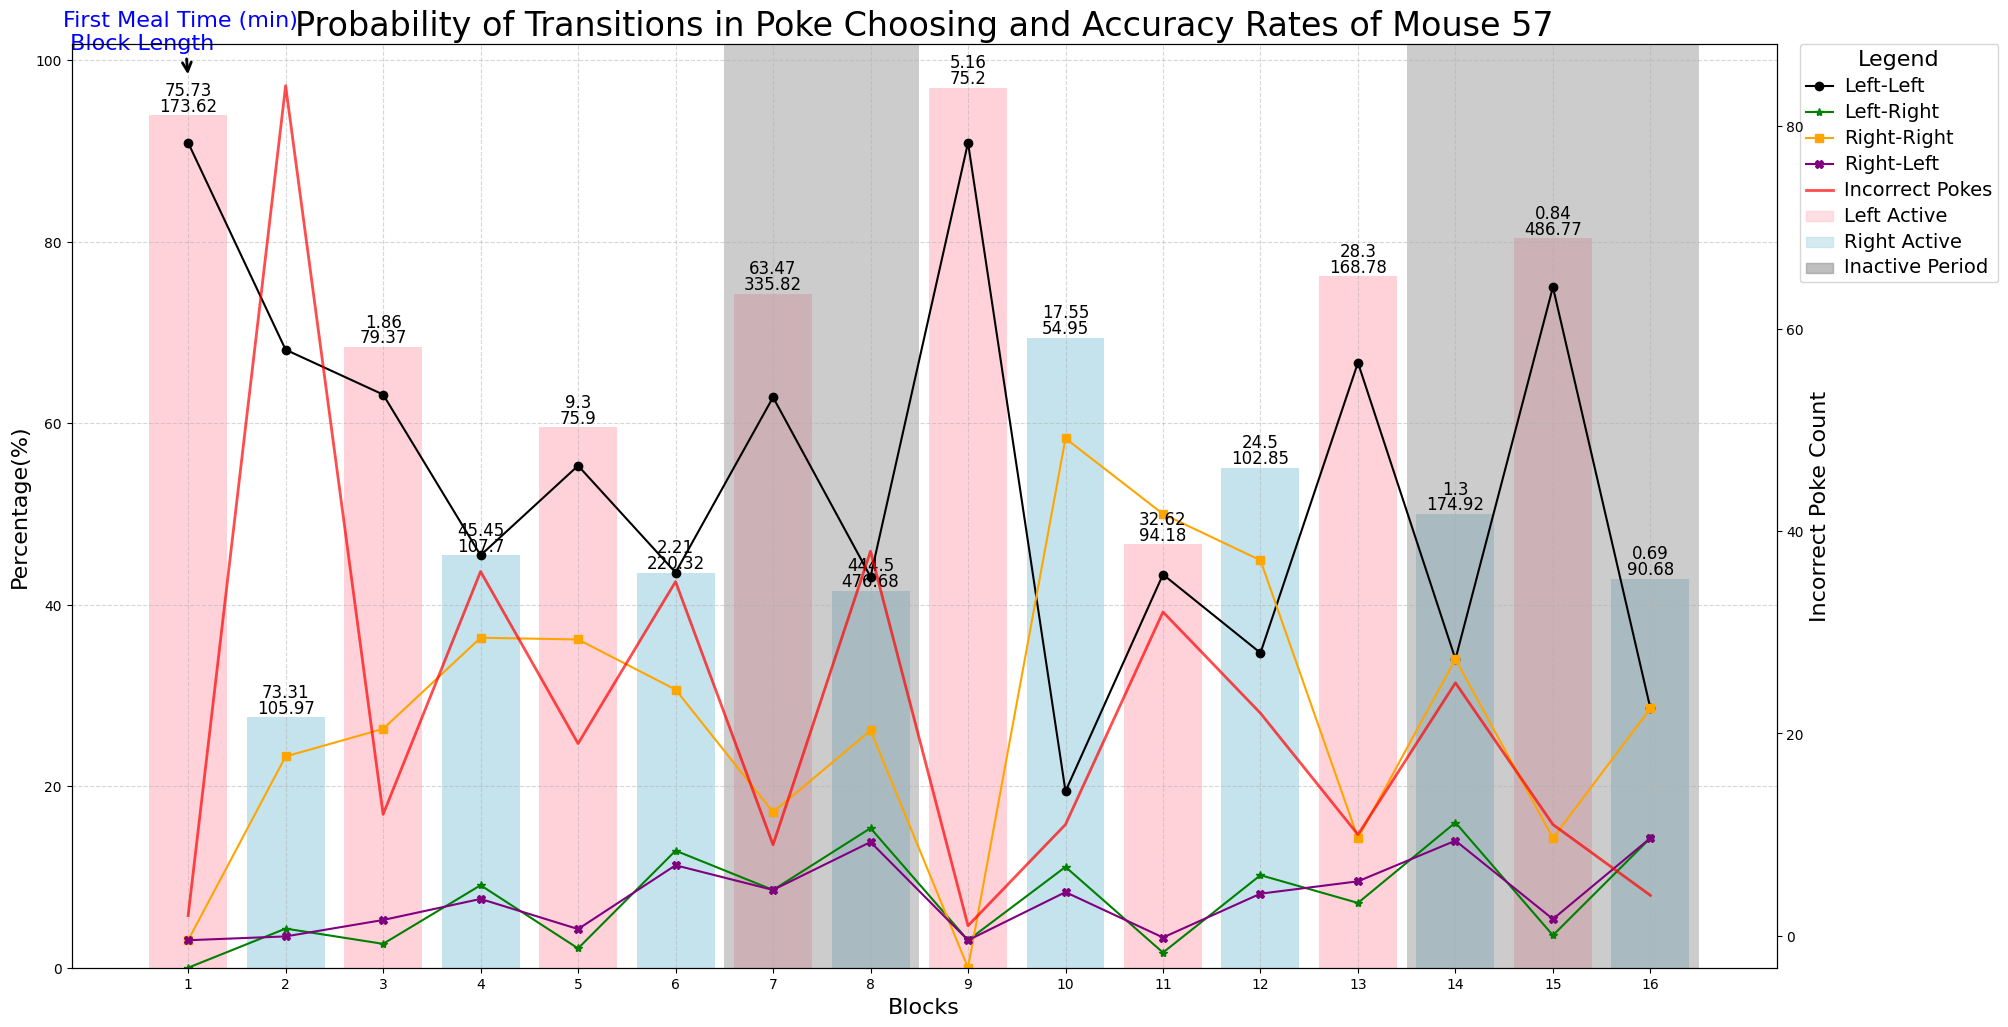

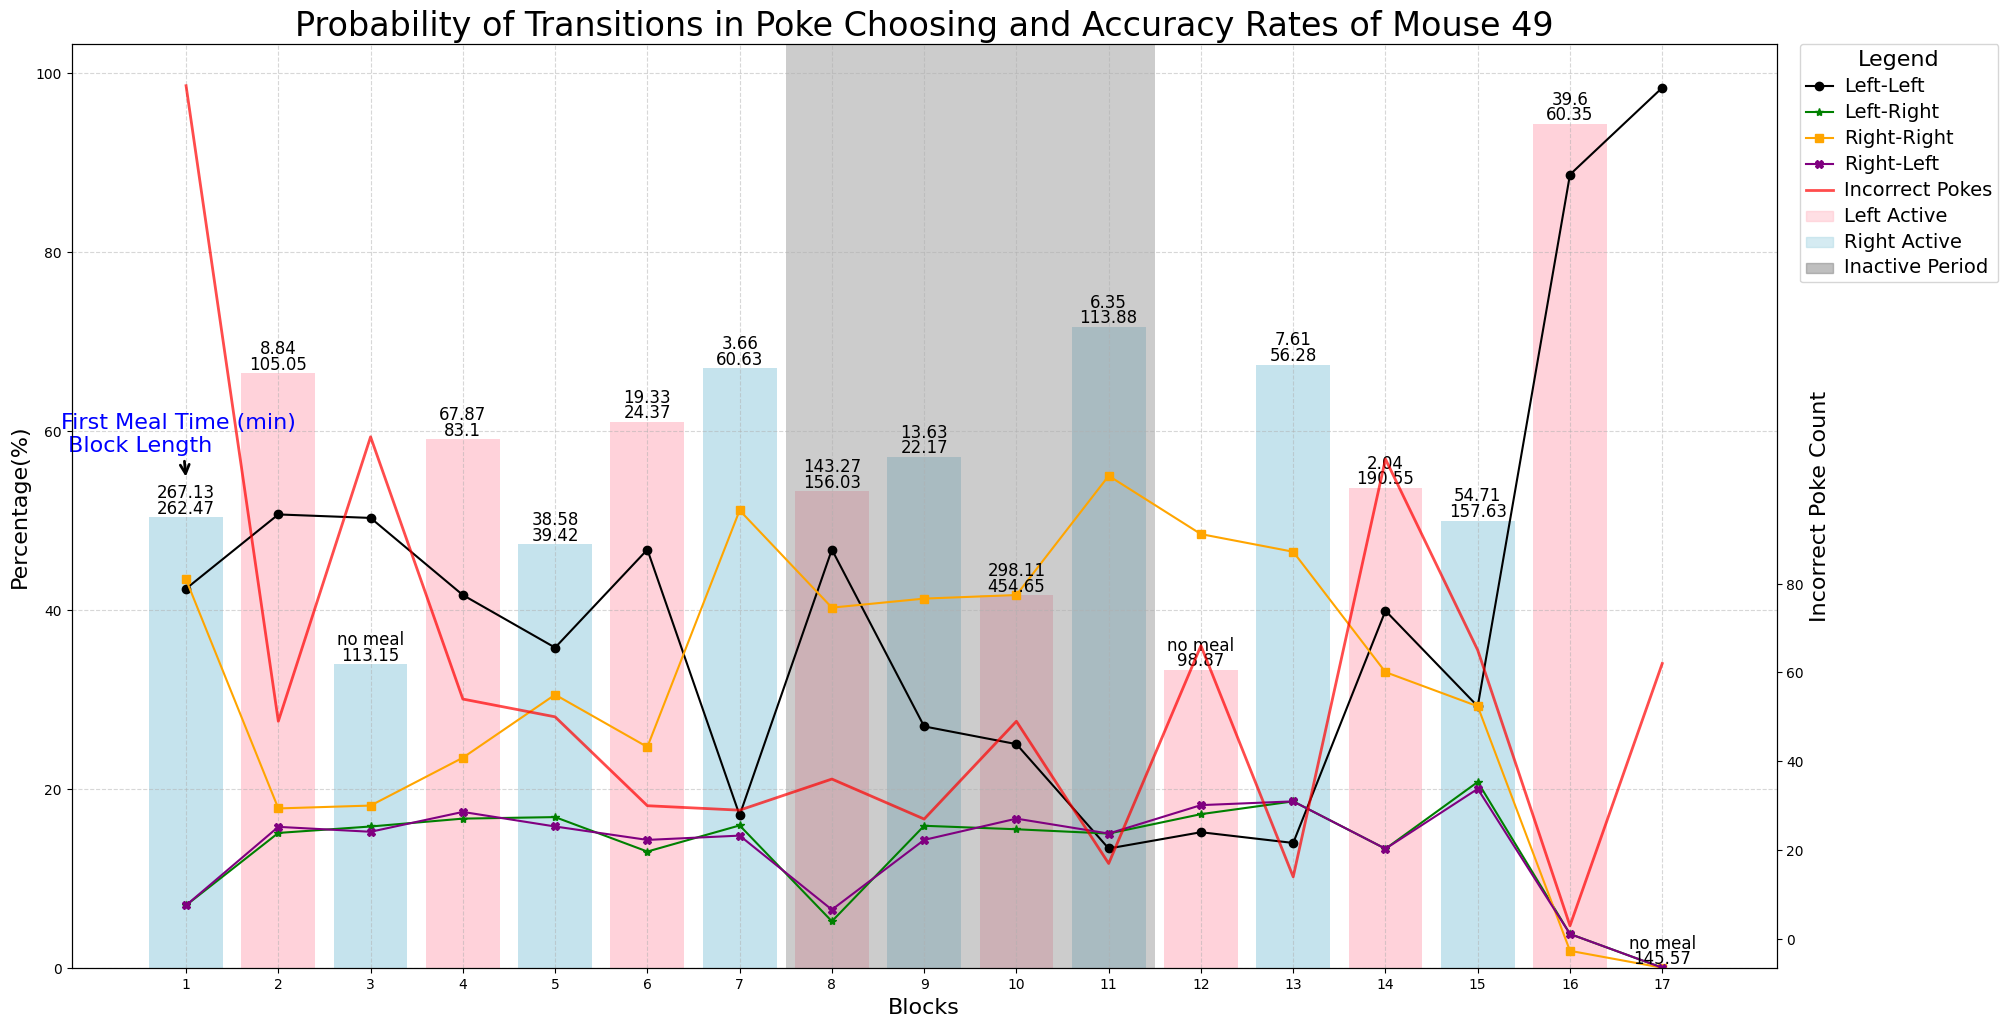

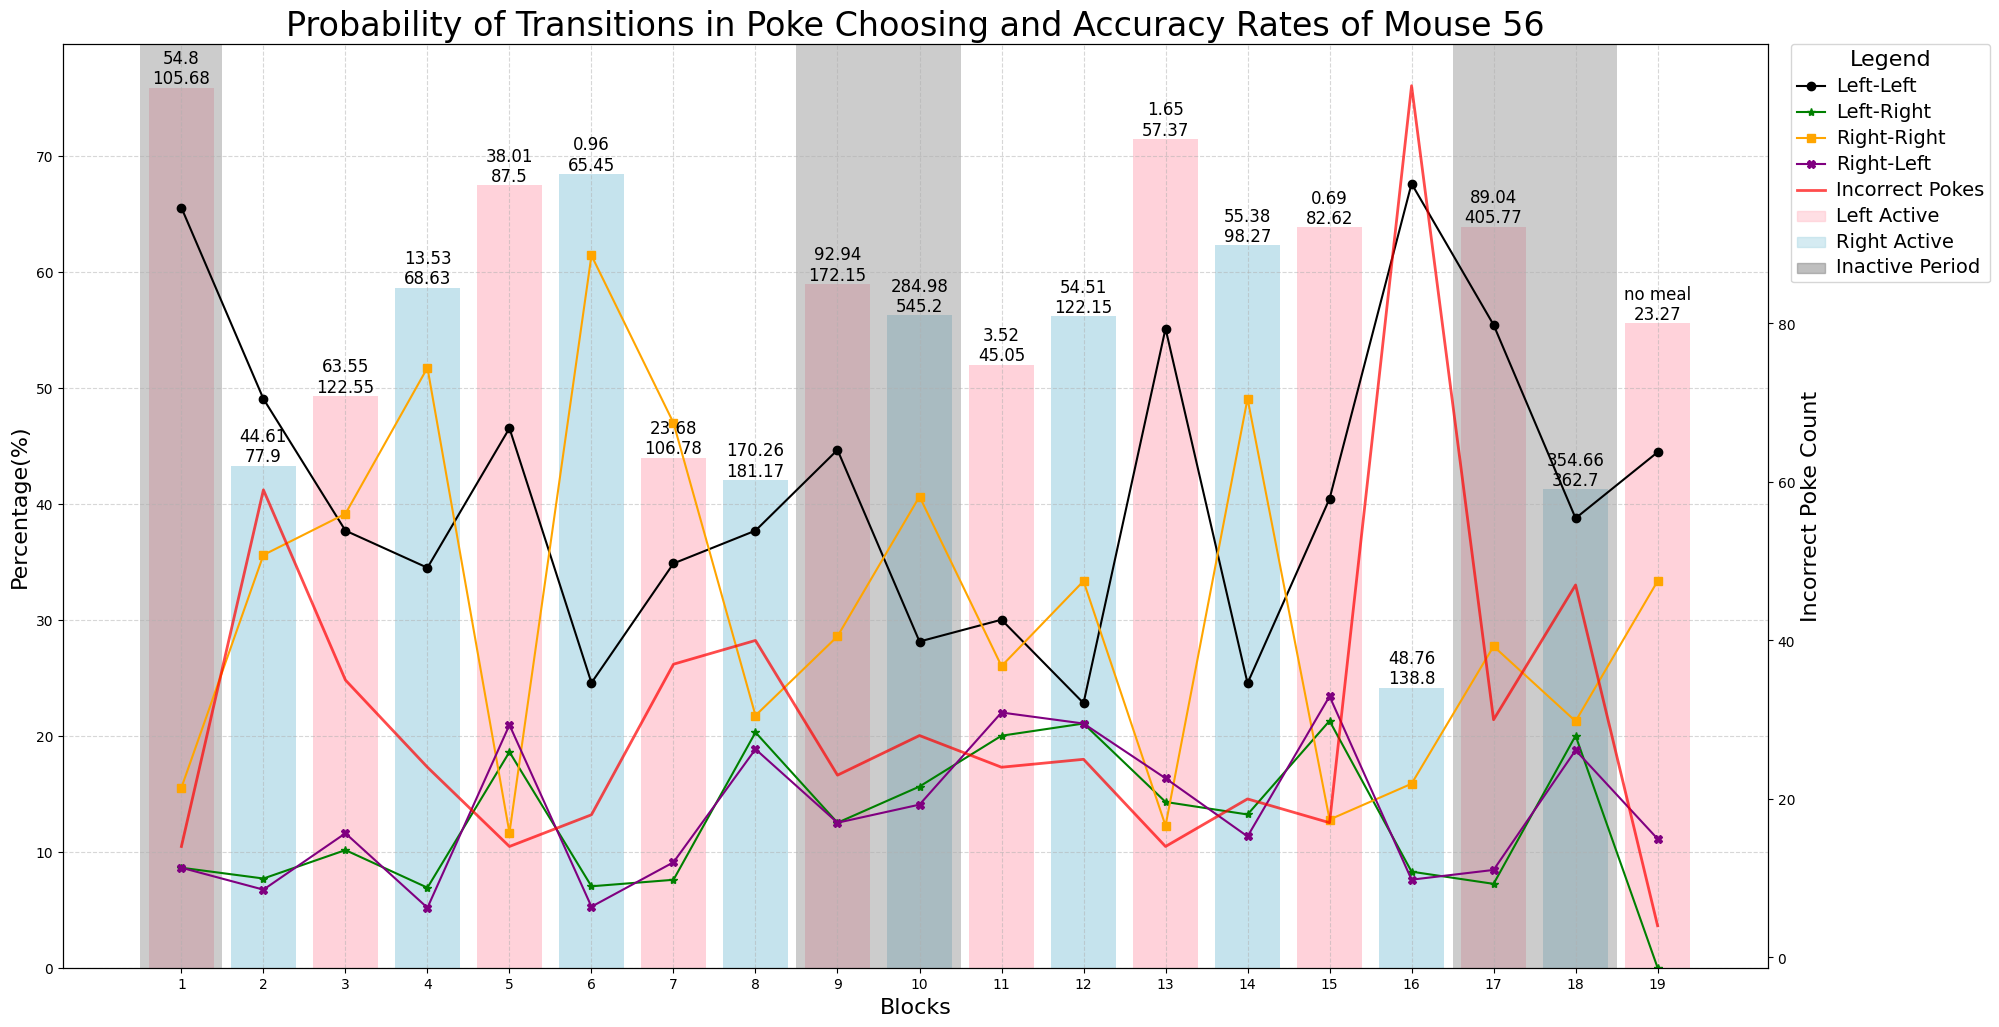

In [12]:
exp_block_fir_meal = []
exp_block_fir_meal_prop = []
exp_meal_avg_acc = []

for path in paths.reversal_ivsa_exp:
  temp_time = []
  temp_prop = []
  temp_acc = []
  meals = []
  temp_cnt = []
  
  data_dropped = read_csv_clean(path, remove_trivial=False, collect_time=True)
  blocks = dit.split_data_to_blocks(data_dropped)
  
  for block in blocks:
    meal, meal_pellet_cnt, meal_acc = find_meals_paper(block,
                                                      time_threshold=time_threshold, 
                                                      pellet_threshold=pellet_count_threshold)
    meals.extend(meal)
    temp_cnt.extend(meal_pellet_cnt)
    temp_acc.extend(meal_acc)
    
  data_stats = dit.get_transition_info(blocks, [time_threshold, pellet_count_threshold], reverse=True)
  avg_ratio, avg_time = dit.first_meal_stats(data_stats, ignore_inactive=True)
  exp_block_fir_meal.append(avg_time)
  exp_meal_avg_acc.append(np.mean(temp_acc))
  exp_block_fir_meal_prop.append(avg_ratio)
  # print(temp_acc[:5])
  dit.graph_tranition_stats(data_stats, blocks, path)

Control Size: 6
PICA Size: 7
Control Average: 28.169999999999998
PICA Average: 28.910714285714285
Control Standard Deviation: 18.84271132294925
PICA Standard Deviation: 12.747009920164098


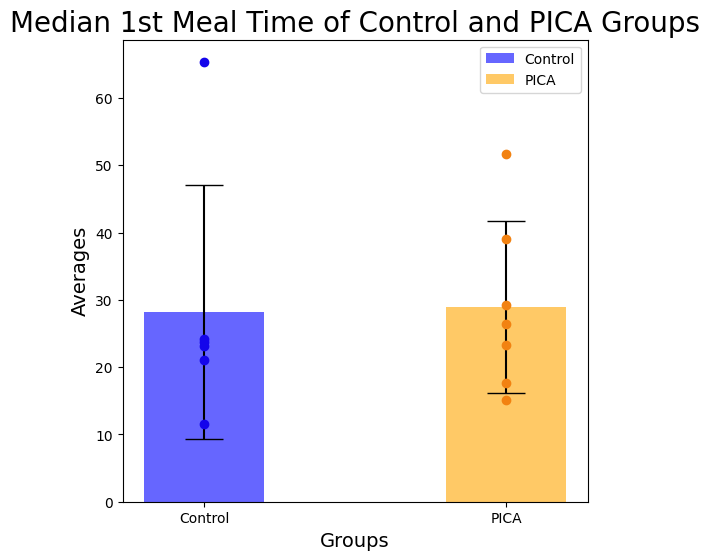

In [13]:
graph_group_stats(ctrl_block_fir_meal, exp_block_fir_meal, stats_name='Median 1st Meal Time', exp_name='PICA')

In [14]:
invs.perform_T_test(ctrl_block_fir_meal, exp_block_fir_meal, test_side='greater')

P Value is  0.46720443697874053
There is no significant difference between the two groups.


Control Size: 6
PICA Size: 7
Control Average: 0.16195100359135162
PICA Average: 0.3355962827728454
Control Standard Deviation: 0.0755538480745732
PICA Standard Deviation: 0.19818674185740037


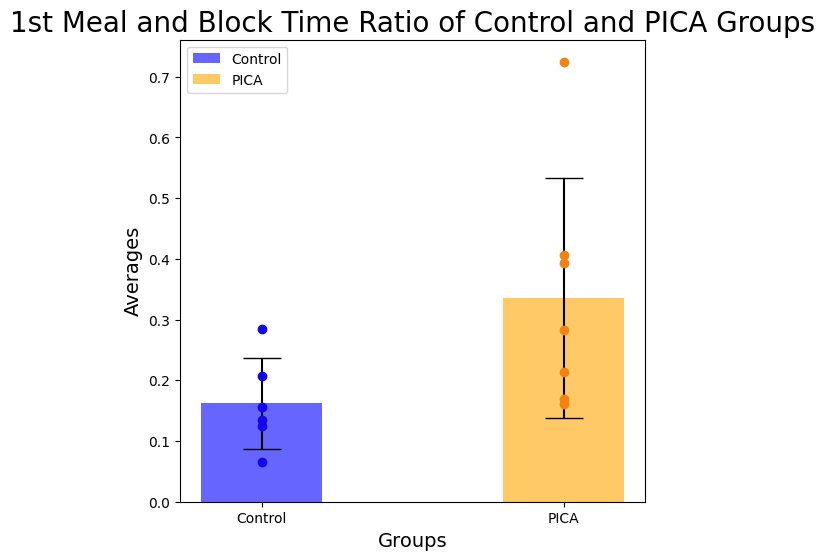

In [15]:
graph_group_stats(ctrl_block_fir_meal_prop, exp_block_fir_meal_prop, stats_name='1st Meal and Block Time Ratio', exp_name='PICA')

In [16]:
invs.perform_T_test(ctrl_block_fir_meal_prop, exp_block_fir_meal_prop, test_side='greater')

P Value is  0.03456822415859384
Experiment group is significantly greater than control group


In [17]:
invs.perform_T_test(ctrl_meal_avg_acc, exp_meal_avg_acc)

P Value is  0.18855255815663818
There is no significant difference between the two groups.
